<h1><center>Physique numérique (PHY-3500)</center></h1>
<h1><center>TP3 - Équations différentielles</center></h1>

## Nom des membres de l'équipe:

### Nom, Prénom :  NI 
### Légaré, Ophélie : 111 182 608
### Parrot, Anaïs : 111 184 980
### Turgeon, David : 111 182 265

### Importation des modules :

In [1]:
import numpy as np
from scipy import array, arange, sqrt
import matplotlib.pyplot as plt
from astropy import constants as const
from astropy.time import Time
%pip install jplephem
from jplephem import Ephemeris
%pip install de421
import de421

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Introduction : 
En physique, les équations différentielles décrivent plusieurs concepts fondamentaux tels que le déplacement d'un système masse-ressort, la position d'un pendule, la déformation d'une poutre soumis à des contraintes, le courant dans un circuit RC,etc. On distingue les équations différentielles ordinaires (EDO) des équations différentielles partielles par la dépendance des fonctions inconnues. Cette étude concerne uniquement des équations différentielles ordinaires; des équations dans lesquelles les fonctions inconnues dépendent d'une seule variable, soit le temps.

Cette dernière porte sur la mécanique des corps célestes du système solaire qui est régi par la deuxième loi de Newton. Ce rapport se divise en trois sections principales; la première concerne les comètes, la deuxième la Terre et la troisième Mars. Dans chaque cas, l'orbite du corps en rotation autour du soleil est calculé à l'aide d'une méthode numérique différente. La méthode Runge-Kutta d'ordre 4 à pas constants et à pas adaptatifs est employée pour une comète donnée. Les calculs de l'orbite de la Terre et de ses énergies potentielle et cinétique sont réalisés à partir des méthodes de Verlet, de Runge-Kutta d'ordre 2 et de Bulirsch-Stoer, puis leur précision respective est comparée. Finalement la position de Mars le jour d’atterissage de l’astromobile Perseverance est calculée en utilisant la méthode de Bulirsch-Stoer.

# Mécanique céleste - comètes

## Question a.
Il est possible de séparer une équation différentielle d'ordre supérieur en plusieurs équations différentielles de premier ordre. La deuxième loi de Newton qui décrit le mouvement bidimensionnel d'une comète autour du soleil est exprimée par deux équations différentielles de deuxième ordre. On sépare ces deux équations pour les ramener à quatre équations différentielles du premier ordre.

La démarche détaillée est présentée pour le mouvement dans la direction $x$ seulement puisque la démarche pour le mouvement en $y$ est la même. 

L'équation différentielle de départ est
$$\frac{d^{2}x}{dt^{2}} = -GM \frac{x}{(x^{2}+y^{2})^{\frac{3}{2}}} = f(x, y).$$
On commence par faire des changements de variable pour chaque degré en $x$.
$$\delta = \frac{dx}{dt}= x'$$
$$\delta' = \frac{d \delta}{dt} = \frac{d^{2}x}{dt^{2}} = x''$$
On substitue ces changements de variable dans l'équation du mouvement et on obtient deux équations différentielles de premier ordre.
$$\delta = \frac{dx}{dt}$$
$$\frac{d \delta}{dt} = -GM \frac{x}{(x^{2}+y^{2})^{\frac{3}{2}}}$$

Dans le cas du mouvement en $y$, on obtient une réponse équivalente avec un changement de variable différent.
$$\gamma = \frac{dy}{dt}$$
$$\frac{d \gamma}{dt} = -GM \frac{y}{(x^{2}+y^{2})^{\frac{3}{2}}}$$

## Question b.
On utilise la méthode de Runge-Kutta d'ordre 4 pour résoudre ces quatre équations différentielles. Le pas $h$ reste constant dans ce programme.

In [ ]:
# Définition des constantes :
G = const.G.value #constante gravitationnelle en m^3/(kg * s^2)
M = const.M_sun.value #masse du soleil en kg

x_0 = 4*10**12 #en mètres
y_0 = 0
delta_0 = 0 #vitesse initiale en x
gamma_0 = 500 #vitesse initiale en y (m/s)

def f(r,t):
    x = r[0]
    y = r[1]
    delta = r[2]
    gamma = r[3]
    position = np.sqrt(x**2 + y**2)
    return np.array([delta, gamma, -G*M*x/position**3, -G*M*y/position**3], float)

a = 0 #temps initial
b = 3600*24*365*100 #temps final (100 ans en secondes)
N = 250000 #nombre de pas
h = (b-a)/N

tpoints = np.arange(a, b, h)
xpoints = []
ypoints = []
r = np.array([x_0, y_0, delta_0, gamma_0], float)

# Méthode RK4 
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = h*f(r, t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6

plt.figure(figsize=(5, 5))
plt.plot(np.array(xpoints, float)/1000, np.array(ypoints, float)/1000)
plt.plot(np.array(xpoints, float)[::1000] / 1000, np.array(ypoints[::1000], float) / 1000, 'ko')
plt.title("Position de la comète dans un plan pour une durée de 100 ans")
plt.xlabel("Position de la comète en x [km]")
plt.ylabel("Position de la comète en y [km]")
plt.show()

On observe que la période de révolution de cette comète autour du soleil est d'environ 49 ans. Le graphique ci-dessus présente la superposition d'au moins deux orbites complètes, soit 100 ans. Le pas $h$ a été sélectionné de sorte que le calcul des deux orbites soit suffisamment précis pour que ces dernières soient superposées. Le nombre $N$ de pas a été fixé à 250 000; toutefois pour une durée de 100 ans les orbites sont superposées pour un $N$ d'au moins 130 000. Si le nombre de pas $N$ est moindre, on obtient des orbites dont la trajectoire diffère davantage à mesure qu'on augmente le nombre d'années. Avec la méthode de Ruger-Kutta de dégré 4, il est possible d'augmenter le $h$ pour accélérer les calculs car cette méthode est plus précise que celles d'Euler ou de Ruger-Kutta de dégré 2 par exemple.

## Question c.
Le programme précédent est modifié pour que le pas $h$ soit adaptatif afin de comparer la justesse des calculs avec la méthode à pas constant. L'avantage du pas adaptatif est qu'il permet d'augmenter la vitesse de calcul là où la position de la comète varie peu avec le temps tout en gardant un pas suffisamment petit là où la vitesse de la comète augmente. La précision est fixée à 1 km par année.

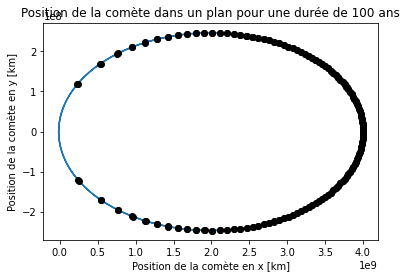

In [6]:
precision = 1000/(3600*24*365) #en m/s    

N = 250000 #nombre de pas
b = 3600*24*365*100 #temps final (100 ans en secondes)
h = (b-a)/N

tpoints = np.arange(a, b, h)
xpoints_ = []
ypoints_ = []
r = np.array([x_0, y_0, delta_0, gamma_0], float)

# Pas adaptatifs
def pas(r, t, h):

    # Pas de h
    pas_1 = pas(r, t, h)
    pas_2 = pas(r + pas_1, t+h, h)
    pas_simple = pas_1 + pas_2

    # Pas de 2h
    pas_double = pas(r, t, 2*h) 
    
    # Erreur, précision
    x1 = pas_simple[0]
    x2 = pas_double[0]
    y1 = pas_simple[1]
    y2 = pas_double[1]
    erreur_x = (x1-x2)/30
    erreur_y = (y1-y2)/30
    erreur = np.sqrt(erreur_x**2 + erreur_y**2)
    rho = (h*precision)/erreur
    h_prime = h*rho**(1/4)

    # Vérification de la précision 
    if rho >= 1:
        t = t+2*h
        
        if rho**(1/4) > 2:
            h *= 2
        else:
            h *= rho**(1/4)

        
    # Extrapolation locale
        pas_simple[0] += 1/15 * (x1-x2)
        pas_simple[1] += 1/15 * (y1-y2)
    
        return pas_simple, h, t
    else:
        return pas(r, t, rho**(1/4) * h)

# Méthode RK4 
for t in tpoints:
    xpoints_.append(r[0])
    ypoints_.append(r[1])
    k1 = h*f(r, t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6
    
plt.figure(figsize=(5, 5))
plt.plot(np.array(xpoints_, float)/1000, np.array(ypoints_, float)/1000)
plt.plot(np.array(xpoints_, float)[::1000] / 1000, np.array(ypoints_[::1000], float) / 1000, 'ko')
plt.title("Position de la comète dans un plan pour une durée de 100 ans")
plt.xlabel("Position de la comète en x [km]")
plt.ylabel("Position de la comète en y [km]")
plt.show()

# Mécanique céleste - la Terre

Dans cette partie, on s'intéresse à la mécanique céleste de la Terre. Son mouvement est décrit par :
$$ \frac{d^2 \mathbf{r}}{dt^2} = -GM\frac{\mathbf{r}}{r^3}$$

En résolvant cette équation différentielle de deuxième ordre, il est possible de calculer l'orbitre de la Terre autour du Soleil. Dans ce cas-ci, $\mathbf{r}$ est un vecteur de deux dimensions, soit $x$ et $y$. 

L'orbitre de la Terre sera calculée grâce à la méthode de Verlet, de Runge-Kutta et de Burlisch-Stoer afin de comparer la précision des trois méthodes. De plus, l'énergie potentielle et cinétique associée au mouvement de la Terre sur son orbitre seront aussi calculées grâce aux deux premières méthodes.

## Question d.

On commence par définir l'équation différentielle de deuxième ordre sous la forme d'une équation $ \frac{d^2 \mathbf{r}}{dt^2} = f(\mathbf{r}, t)$. On définit ensuite la méthode de Verlet pour commencer. Partant des conditions initiales données dans le problème, on résout l'équation pour être en mesure de tracer l'orbitre de la Terre. Le périhélie représente le point où la Terre est le plus près du Soleil. À cet endroit, la Terre est perpendiculaire à la ligne la reliant au Soleil.

In [16]:
# Définition des constantes :
G = const.G.value   # Constante gravitationnelle [m^3/(kg s^2)]
M = const.M_sun.value   # Masse du Soleil [kg]
m = const.M_earth.value  # Masse de la Terre [kg]


def f(x, y):
    # Dérivée de 2ème ordre
    r = np.sqrt(x**2 + y**2)   # Norme du vecteur en 2 dimensions
    return - G * M * x / r**3, - G * M * y / r**3


def Verlet(x0, y0, v_x0, v_y0, h, t_max):
    # x0, y0, v_x0 et v_y0 représentent les données initiales du problème, h est l'incrément temporel utilisé
    # et t_max est le temps maximal sur lequel on veut résoudre l'équation différentielle. t_max est un multiple
    # de h et ne réfère pas au temps de simulation.
    
    x_pts = [x0]  # Ces deux listes permettent d'enregistrer la position de la Terre sur son orbitre.
    y_pts = [y0]
    
    for i in range(int(t_max/h)):
        # On itère sur le nombre d'incréments temporels choisi en arguement de la fonction.
        
        if i == 0:
            # On définit ici les premiers paramètres selon la méthode de Verlet et à partir des conditions 
            # initiales du problème.
            init = f(x0, y0)
            v_x_moitie = v_x0 + 1/2 * h * init[0]
            v_y_moitie = v_y0 + 1/2 * h * init[1]
            
            x_suiv = x0 + h * v_x_moitie
            y_suiv = y0 + h * v_y_moitie
            
        else :
            # Par la suite, on définit les paramètres suivants dans notre itération à partir des précédents 
            # paramètres calculés.
            v_x_moitie = v_x_moitie + k_x
            v_y_moitie = v_y_moitie + k_y
            
            x_suiv = x_suiv + h * v_x_moitie
            y_suiv = y_suiv + h * v_y_moitie
        
        # Les calculs suivants s'appliquent à chaque itération.
        suiv = f(x_suiv, y_suiv)
        k_x = h * suiv[0]
        k_y = h * suiv[1]
    
        v_x_suiv = v_x_moitie + 1/2 * k_x
        v_y_suiv = v_y_moitie + 1/2 * k_y
        
        # On ajoute les positions calculés à nos listes de points pour tracer prochainement l'orbitre de la Terre.
        x_pts.append(x_suiv)
        y_pts.append(y_suiv)
        
        # Pour garder une trace des itérations et s'assurer qu'on a passé la première qui exige des définitions
        # différentes pour les paramètres v_moitié et x/y_suiv.
        i += 1
        
    return x_pts, y_pts

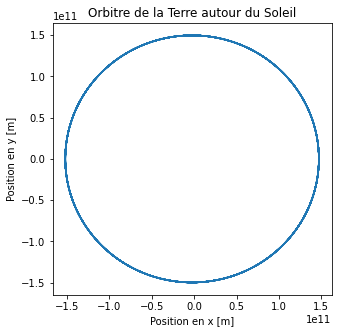

In [17]:
# Données initiales du problème : 
x0 = 1.4710e11  # m
y0 = 0  # m
v_x0 = 0  # m/s
v_y0 = 3.0287e4 # m/s
h = 3600  # s, donc 1 h

# Résoudre l'équation différentielle avec les données initiales du problème : 
sln = Verlet(x0, y0, v_x0, v_y0, h, h*8760*10)  # t_max est exprimé en h et il y a 8760 heures par année. On 
# teste donc ici avec 10 années, soit 10 orbitres.

plt.figure(figsize=(5, 5))
plt.plot(sln[0], sln[1])  # (x, y)
plt.title("Orbitre de la Terre autour du Soleil")
plt.xlabel("Position en x [m]")
plt.ylabel("Position en y [m]")
plt.show()

In [18]:
print("En x, le demi-axe vaut {:.6f} Gm et, en y, il vaut {:.6f} Gm.".format(np.amax(sln[0])/1e9, np.amax(sln[1])/1e9))
print("Dans les négatifs, on retrouve une valeur de {:.6f} Gm en x et de {:.6f} Gm en y.".format(np.amin(sln[0])/1e9, np.amin(sln[1])/1e9))
# L'affichage s'arrêtant au km est imposé de manière à faciliter la comparaison avec les valeurs obtenues à la
# question g).

En x, le demi-axe vaut 147.100000 Gm et, en y, il vaut 149.584729 Gm.
Dans les négatifs, on retrouve une valeur de -152.111391 Gm en x et de -149.584703 Gm en y.


Tel qu'attendu, l'orbitre est quelque peu elliptique. Le périhélie en $x$ est respecté. Pour les autres paramètres comme l'aphélie, ceux-ci sont aussi dans les bons ordres de grandeur [1].

## Question e.

Le précédent code définissant la méthode de Verlet est maintenant modifié pour qu'il calcule aussi les énergies potentielle et cinétique à chaque pas. Il sera ainsi possible de tracer ces énergies en fonction du temps.

In [19]:
def Verlet_modif(x0, y0, v_x0, v_y0, h, t_max):
    x_pts = [x0]
    y_pts = [y0]
    
    # On ajoute maintenant des listes qui enregisteront le temps écoulé, ainsi que les énergies potentielle et
    # cinétique à chaque pas. 
    t = np.linspace(h, t_max, int(t_max/h))
    E_pot = []
    E_cin = []
    
    for i in range(int(t_max/h)):
        if i == 0:
            init = f(x0, y0)
            v_x_moitie = v_x0 + 1/2 * h * init[0]
            v_y_moitie = v_y0 + 1/2 * h * init[1]
            
            x_suiv = x0 + h * v_x_moitie
            y_suiv = y0 + h * v_y_moitie
            
        else :
            v_x_moitie = v_x_moitie + k_x
            v_y_moitie = v_y_moitie + k_y
            
            x_suiv = x_suiv + h * v_x_moitie
            y_suiv = y_suiv + h * v_y_moitie
    
        suiv = f(x_suiv, y_suiv)
        k_x = h * suiv[0]
        k_y = h * suiv[1]
    
        v_x_suiv = v_x_moitie + 1/2 * k_x
        v_y_suiv = v_y_moitie + 1/2 * k_y
        
        x_pts.append(x_suiv)
        y_pts.append(y_suiv)
        
        # On doit maintenant calculer la norme des vecteurs r et v pour pouvoir mesurer les énergies potentielle
        # et cinétique. 
        r = np.sqrt(x_suiv**2 + y_suiv**2)
        v = np.sqrt(v_x_suiv**2 + v_y_suiv**2)
        E_pot.append(-G * M * m / r) 
        E_cin.append(1/2 * m * v**2)
        
        i += 1
        
    return x_pts, y_pts, t, E_pot, E_cin

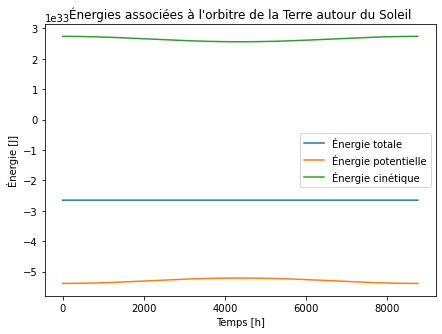

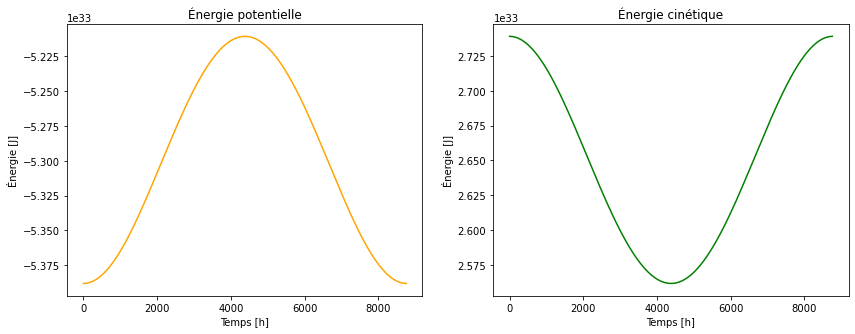

In [20]:
sln = Verlet_modif(x0, y0, v_x0, v_y0, h, h*8760)  # t_max est exprimé en h et il y a 8760 heures par année. 
# Ici, une seule année est représentée, donc un seul orbitre.

# Pour additionner les deux énergies :
E_tot = []
for i in range(len(sln[3])):
    E_tot.append(sln[3][i] + sln[4][i])

plt.figure(figsize=(7, 5))
plt.plot(sln[2]/3600, E_tot, label="Énergie totale")
plt.plot(sln[2]/3600, sln[3], label="Énergie potentielle")
plt.plot(sln[2]/3600, sln[4], label="Énergie cinétique")
plt.title("Énergies associées à l'orbitre de la Terre autour du Soleil")
plt.xlabel("Temps [h]")
plt.ylabel("Énergie [J]")
plt.legend()
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
ax1.plot(sln[2]/3600, sln[3], "orange")
ax1.set_title("Énergie potentielle")
ax1.set_xlabel("Temps [h]")
ax1.set_ylabel("Énergie [J]")
ax2.plot(sln[2]/3600, sln[4], "green")
ax2.set_title("Énergie cinétique")
ax2.set_xlabel("Temps [h]")
ax2.set_ylabel("Énergie [J]")
plt.show()

On constate que la somme des deux énergies donne une constante dans le temps. Par conséquent, le principe de conservation de l'énergie est respecté. Là où l'énergie potentielle est maximale, l'énergie cinétique est minimale. Le périhélie représente la distance où la Terre est la plus proche du Soleil. Il est donc normal que ce soit au temps zéro que l'énergie potentielle est minimale et que l'énergie cinétique est maximale. Après avoir complété la moitié de son orbitre, la Terre se trouve à l'aphélie, et donc, l'énergie potentielle est maximale.

## Question f.

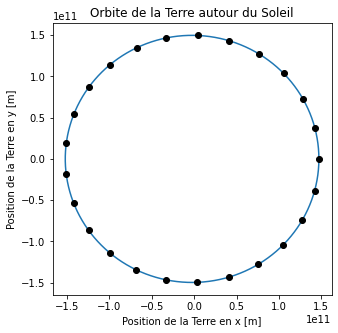

In [33]:
# Données initiales du problème : 
x0 = 1.4710e11  # m
y0 = 0  # m
v_x0 = 0  # m/s
v_y0 = 3.0287e4 # m/s

a = 0 #temps initial
b = 3600*8760 #temps final en s (nombre de secondes par année, pour une orbite complète)
N = 250000 #nombre de pas
h = (b-a)/N

def f(r,t):
    # La dérivée de 2e ordre est redéfinie ici de manière à faciliter les calculs
    x = r[0]
    y = r[1]
    v_x = r[2]
    v_y = r[3]
    distance = np.sqrt(x**2 + y**2)  # Norme du vecteur en 2 dimensions
    return np.array([v_x, v_y, -G*M*x/distance**3, -G*M*y/distance**3], float)

tpoints = np.arange(a,b,h) 
xpoints = [] 
ypoints = [] 
r = np.array([x0, y0, v_x0, v_y0], float)

# Méthode RK2
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = h*f(r, t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    r += k2
    
plt.figure(figsize=(5, 5))    
plt.plot(np.array(xpoints, float), np.array(ypoints, float))
plt.plot(np.array(xpoints, float)[::10000], np.array(ypoints[::10000], float), 'ko')
plt.title("Orbite de la Terre autour du Soleil")
plt.xlabel("Position de la Terre en x [m]")
plt.ylabel("Position de la Terre en y [m]")
plt.show()

## Question g.
On calcule maintenant l'orbite de la Terre avec la méthode de Bulirsch-Stoer. La précision est fixée à 1 km par année et l'intervalle $H$ est de une semaine. L'implémentation de cette méthode s'inspire de l'exemple 8.7 du manuel de cours [2].

In [46]:
def Bulirsch_Stoer(x0, y0, v_x0, v_y0, H, t_max, precision):
    # x0, y0, v_x0 et v_y0 représentent les données initiales du problème, H est l'incrément temporel utilisé,
    # t_max est le temps maximal sur lequel on veut résoudre l'équation différentielle et precision est la 
    # précision souhaitée pour chaque nouvelle position calculée. t_max est un multiple de h et ne réfère pas 
    # au temps de simulation.
    
    temps = np.arange(0, t_max+H, H)  # On définit ici l'intervalle de temps allant de 0 à t_max par bonds de H.
    points_x = []   # Ces deux listes permettent d'enregistrer la position de la Terre sur son orbitre.
    points_y = []
    r = np.array([x0, y0, v_x0, v_y0], float)  # Vecteur initial dont dépend la dérivée de 2e ordre
    
    for t in temps:
        # On itère sur le nombre d'incréments temporels choisi en arguement de la fonction.
        points_x.append(r[0])
        points_y.append(r[1])
        
        # Calcul d'un premier point milieu modifié :
        n = 1 
        r1 = r + 0.5*H*f(r) 
        r2 = r + H*f(r1) 
        
        # Calcul de la première extrapolation de Richardson à partir du premier point milieu modifié :
        R1 = np.empty([n, 4], float)  # Puisque r est un vecteur à 4 dimensions
        R1[0] = 0.5*(r1 + r2 + 0.5*H*f(r2))
        
        erreur = 2*H*precision
        while erreur > H*precision:
            # On va itérer sur n jusqu'à ce que l'erreur sur notre calcul atteigne la précision voulue.
            n += 1 
            h = H/n  # Incréments ajustés selon n, et donc, la précision voulue
            
            # Méthode de mi-chemin modifiée :
            r1 = r + 0.5*h*f(r) 
            r2 = r + h*f(r1) 
            for i in range(n-1): 
                r1 += h*f(r2) 
                r2 += h*f(r1) 
            
            # Extrapolation de Richardson :
            R2 = R1 
            R1 = np.empty([n, 4], float)  # Puisque r est un vecteur à 4 dimensions
            R1[0] = 0.5*(r1 + r2 + 0.5*h*f(r2))
            for m in range(1,n): 
                epsilon = (R1[m-1]-R2[m-1])/((n/(n-1))**(2*m)-1) 
                R1[m] = R1[m-1] + epsilon 
            erreur = abs(epsilon[0])  # Nouveau calcul de l'erreur de notre estimé
        
        r = R1[n-1]  # Une fois que nous avons atteint la précision voulue, la boucle s'arrête et nous 
        # recommençons une nouvelle itération avec le dernier estimé calculé. C'est d'ailleurs cet estimé qui
        # est enregistré, par après, dans les listes points_x et points_y.
    
    return points_x, points_y

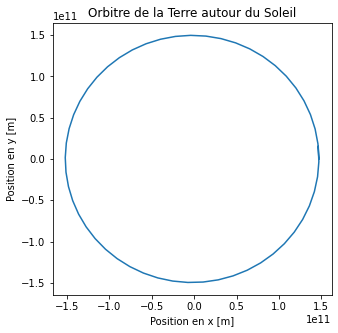

In [47]:
# Données initiales du problème : 
H = 3600*24*7  # s, donc 1 semaine
t_max = 3600*8760   # s, donc 1 orbitre
precision = 1000 # m, donc 1 km

# Résoudre l'équation différentielle avec les données initiales du problème, et ce, pour un orbitre complet : 
sln = Bulirsch_Stoer(x0, y0, v_x0, v_y0, H, t_max, precision)

plt.figure(figsize=(5, 5))
plt.plot(sln[0], sln[1])
plt.title("Orbitre de la Terre autour du Soleil")
plt.xlabel("Position en x [m]")
plt.ylabel("Position en y [m]")
plt.show()

In [48]:
print("En x, le demi-axe vaut {:.6f} Gm et, en y, il vaut {:.6f} Gm.".format(np.amax(sln[0])/1e9, np.amax(sln[1])/1e9))
print("Dans les négatifs, on retrouve une valeur de {:.6f} Gm en x et de {:.6f} Gm en y.".format(np.amin(sln[0])/1e9, np.amin(sln[1])/1e9))
# En présentant 6 chiffres décimaux, on montre la précision calculée au km près.

En x, le demi-axe vaut 147.100000 Gm et, en y, il vaut 149.575124 Gm.
Dans les négatifs, on retrouve une valeur de -152.102188 Gm en x et de -149.501557 Gm en y.


Pour rappel, avec la méthode de Verlet, il a été obtenu : 

En x, le demi-axe vaut 147.100000 Gm et, en y, il vaut 149.584729 Gm.

Dans les négatifs, on retrouve une valeur de -152.111391 Gm en x et de -149.584703 Gm en y.

On voit ainsi que la méthode de Bulirsch-Stoer permet d'obtenir des valeurs semblables à celles calculées avec la méthode de Verlet. Toutefois, les chiffres changent d'une méthode à l'autre dès la dizaine de Mm. Avec la méthode de Bulirsch-Stoer, nous sommes assurés de la précision de nos calculs jusqu'au km. Par comparaison, on voit ainsi que la méthode de Verlet est bien moins précise, alors même qu'un incrément de 1 heure a été choisie. Pour la méthode de Bulirsch-Stoer, c'est un incrément d'une semaine qui a été choisie, soit un incrément 168 fois plus gros.

La méthode de Verlet étant une méthode de type *leapfrog*, son erreur est proportionnelle à $h^3$. Pour la méthode de Bulirsch-Stoer, l'extrapolation de Richardson permet justement d'éliminer successivement les termes d'erreur d'ordre supérieur.  

# Mécanique céleste - Mars

Pour cette dernière partie, on s'intéresse à l'orbitre de la planète Mars. Celui-ci sera calculé grâce à la méthode de Bulirsh-Stoer définie plus tôt. Plus exactement, on souhaîte connaître la position de la planète Mars à une date précise, connaissant sa position à une autre date précise. Ces deux dates correspondent au jour prévu de l'attérissage et au jour de lancement de l'astromobile *Perseverance*.

Le module <code>jplephem</code> et l'éphéméride <code>de421</code> permettront de connaître la position et la vitesse de Mars en date du 30 juillet 2020 et de comparer les positions calculées avec la méthode de Bulirsh-Stoer à la date du 18 février 2021. Cet éphéméride donne des positions en km et des vitesses en km/jour. Il faut donc commencer par les convertir en m et en m/s. De plus, cela nous donne des vecteurs en 3 dimensions. Il faut donc modifier les précédentes fonctions utilisées au g) pour inclure la dimension manquante. 

## Question h.

On commence par trouver la position et la vitesse de Mars aux deux dates souhaitées.

In [49]:
# Éphéméride utilisée :
eph = Ephemeris(de421)

# Dates :
lancement=Time("2020-07-30")
atterissage=Time("2021-02-18")

# position en km, vitesse en km par jour
# En date du lancement :
pos_i, vit_i = eph.position_and_velocity('mars', lancement.jd)
position_i = pos_i * 1000   # m
vitesse_i = vit_i / 86400 * 1000  # m/s

# En date de l'attérissage (valeurs attendues) :
print()
pos_f = eph.position('mars', atterissage.jd)
position_f = pos_f * 1000   # m

On redéfinit maintenant les équations de la question g) de façon à inclure la troisième dimension manquante.

In [50]:
def f(r):
    # Dérivée de 2ème ordre
    x = r[0]
    y = r[1]
    z = r[2]
    v_x = r[3]
    v_y = r[4]
    v_z = r[5]
    distance = np.sqrt(x**2 + y**2 + z**2)   # Norme du vecteur en 3 dimensions
    return np.array([v_x, v_y, v_z, -G*M*x/distance**3, -G*M*y/distance**3, -G*M*z/distance**3], float)


def Bulirsch_Stoer(position, vitesse, H, t_max, precision):
    # position et vitesse représentent des vecteurs en trois dimensions contenant les données initiales du 
    # problème, H est l'incrément temporel utilisé, t_max est le temps maximal sur lequel on veut résoudre 
    # l'équation différentielle et precision est la précision souhaitée pour chaque nouvelle position calculée. 
    # t_max est un multiple de h et ne réfère pas au temps de simulation.
    
    temps = np.arange(0, t_max+H, H)  # On définit ici l'intervalle de temps allant de 0 à t_max par bonds de H.
    points_x = []
    points_y = []
    points_z = []
    # Définition du vecteur initial dont dépend la dérivée de 2e ordre : 
    r = np.array([position[0][0], position[1][0], position[2][0], vitesse[0][0], vitesse[1][0], vitesse[2][0]], float)
    
    for t in temps:
        points_x.append(r[0])
        points_y.append(r[1])
        points_z.append(r[2])
        
        n = 1 
        r1 = r + 0.5*H*f(r) 
        r2 = r + H*f(r1) 
        
        R1 = np.empty([n, 6], float)   # Puisque r est un vecteur à 6 dimensions
        R1[0] = 0.5*(r1 + r2 + 0.5*H*f(r2))
        
        erreur = 2*H*precision
        while erreur > H*precision:
            n += 1 
            h = H/n
            
            # Méthode de mi-chemin modifiée  
            r1 = r + 0.5*h*f(r) 
            r2 = r + h*f(r1) 
            for i in range(n-1): 
                r1 += h*f(r2) 
                r2 += h*f(r1) 
            
            # Extrapolation Richardson 
            R2 = R1 
            R1 = np.empty([n, 6], float)  # Puisque r est un vecteur à 6 dimensions
            R1[0] = 0.5*(r1 + r2 + 0.5*h*f(r2))
            for m in range(1,n): 
                epsilon = (R1[m-1]-R2[m-1])/((n/(n-1))**(2*m)-1) 
                R1[m] = R1[m-1] + epsilon 
            erreur = abs(epsilon[0])  
        
        r = R1[n-1]
    
    return points_x, points_y, points_z

L'intervalle de temps $H$ utilisé et la précision souhaîtée ont été choisies de manière arbitraire en assurant une bonne précision sur les calculs.

Le 18 février 2021 se trouve 203 jours plus tard que le 30 juillet 2020. On pose donc t_max comme étant égal à 203 jours.

In [55]:
# Données initiales du problème : 
H = 3600  # s, donc 1 h
precision = 10 # m
t_max = 3600*24*203   # 203 jours plus tard

sln = Bulirsch_Stoer(position_i, vitesse_i, H, t_max, precision)
print("La méthode de Bulirsch-Stoer donne la position suivante en Gm : ({:.8f}, {:.8f}, {:.8f})".format(sln[0][-1]/1e9, sln[1][-1]/1e9, sln[2][-1]/1e9))

print("L'éphéméride utilisée prévoit la position suivante en Gm :(", position_f[0][0]/1e9, position_f[1][0]/1e9, position_f[2][0]/1e9,")")

La méthode de Bulirsch-Stoer donne la position suivante en Gm : (-5.47732281, 210.81203890, 96.86168830)
L'éphéméride utilisée prévoit la position suivante en Gm :( -1.945385232669045 214.2804165286719 98.3090642723317 )


Comparer les résultats entre eux + Commentez,  notamment  sur  vos  limites  et celles de la méthode utilisée, peut-être en vous inspirant d’informations à cette adresse : https://en.wikipedia.org/wiki/Jet_Propulsion_Laboratory_Development_Ephemeris

## Références

[1] NASA (2020). *Earth Fact Sheet*. https://nssdc.gsfc.nasa.gov/planetary/factsheet/earthfact.html

[2] Mark Newman (2013). *Computational Physics*. University of Michigan. 